# 4. Compare Execution Times

In [76]:
# Given the execution times of a particular task, we can load all of them from the execution times dictionaries and then convert them 
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import defaultdict

In [77]:
# Open the execution times folder
execution_times_folder = "../execution_times"

In [78]:
# Load execution times from a file for query_1_execution_times_spark.json

def load_execution_times(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

In [79]:
# Create a function to plot the execution times and make that much easier

In [80]:
# Load the execution times from query_1_execution_times_spark.json
file_path = os.path.join(execution_times_folder, 'query_1_execution_times_pyspark.json')
query_1_execution_times_spark = load_execution_times(file_path)
# Convert the json into a dictionary
query_1_execution_times_spark = {int(k): v for k, v in query_1_execution_times_spark.items()}
query_1_execution_times_spark

{100: 0.2776815891265869,
 1000: 0.3841622591018677,
 10000: 0.6273785829544067,
 100000: 0.841920018196106}

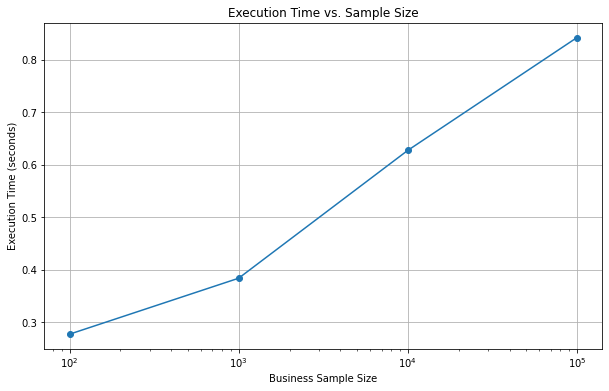

In [81]:
# Plot a graph with the dictionary of sample_size to execution_time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(query_1_execution_times_spark.keys()), list(query_1_execution_times_spark.values()), marker="o")
plt.xscale("log")
plt.xlabel("Business Sample Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs. Sample Size")
plt.grid(True)
plt.show()

update this code to update the dictionary to be formatted like this: {1: [query_1_execution_times_spark.json, query_1_execution_times_postgres.json], 2: query_2_execution_times_spark.json, query_2_execution_times_postgres.json]} and so on

In [82]:
# Initialize a defaultdict to store the files by query number
file_groups = defaultdict(list)

# Loop over all files in the directory
for filename in os.listdir(execution_times_folder):
    if filename.endswith('.json'):  # Ensure we're only working with JSON files
        # Extract the query number from the filename
        query_number = int(filename.split('_')[1])  # Convert to integer to make it a number key
        file_groups[query_number].append(filename)

# Now, file_groups should have the format {query_number: [list_of_files]}
# Convert defaultdict to a regular dictionary
file_groups = dict(file_groups)

# Order the file groups in ascending order of query number
file_groups = dict(sorted(file_groups.items()))

# Print the updated file groups dictionary
print(file_groups)

{1: ['query_1_execution_times_postgres.json', 'query_1_execution_times_pyspark.json'], 2: ['query_2_execution_times_postgres.json', 'query_2_execution_times_pyspark.json'], 3: ['query_3_execution_times_pyspark.json', 'query_3_execution_times_postgres.json'], 4: ['query_4_execution_times_pyspark.json', 'query_4_execution_times_postgres.json'], 5: ['query_5_execution_times_pyspark.json', 'query_5_execution_times_postgres.json']}


In [83]:
# In file groups, make sure that each list has postgres listed first and pyspark listed second in the inner lists
for query_number, files in file_groups.items():
    if len(files) == 2 and 'pyspark' in files[0]:
        files[0], files[1] = files[1], files[0]

print(file_groups)

{1: ['query_1_execution_times_postgres.json', 'query_1_execution_times_pyspark.json'], 2: ['query_2_execution_times_postgres.json', 'query_2_execution_times_pyspark.json'], 3: ['query_3_execution_times_postgres.json', 'query_3_execution_times_pyspark.json'], 4: ['query_4_execution_times_postgres.json', 'query_4_execution_times_pyspark.json'], 5: ['query_5_execution_times_postgres.json', 'query_5_execution_times_pyspark.json']}


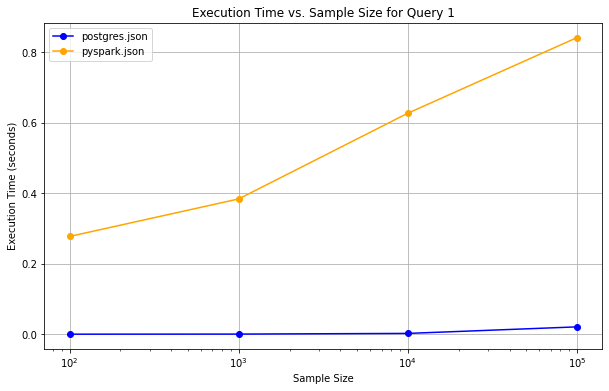

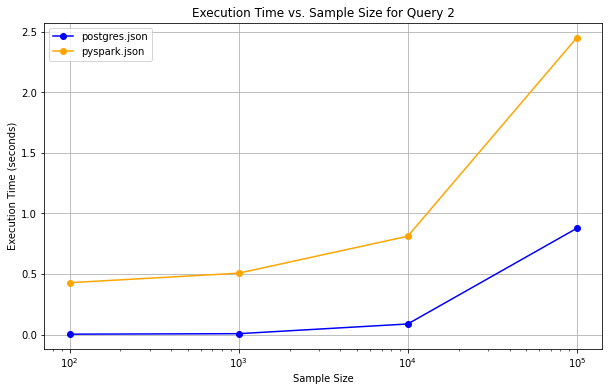

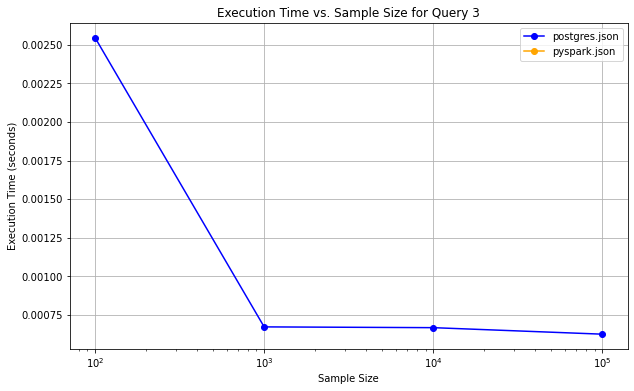

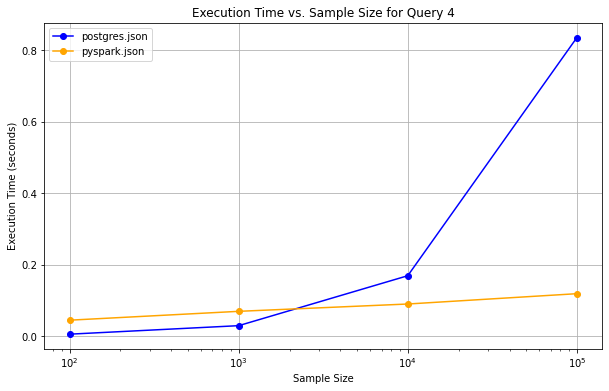

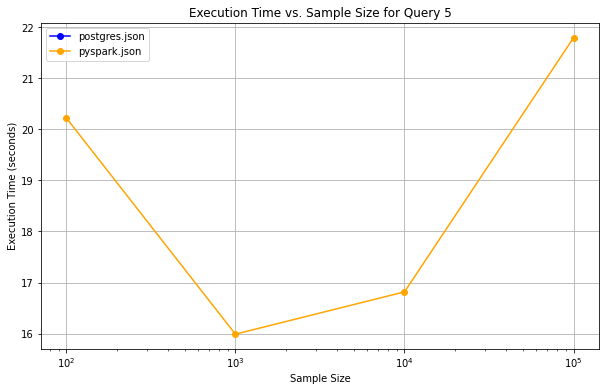

In [84]:
# Iterate through each query number, and then create a side-by-side graph of the execution times for that pair
for query_number, files in file_groups.items():

    # Load the execution times from the first file
    file_path_1 = os.path.join(execution_times_folder, files[0])
    execution_times_1 = load_execution_times(file_path_1)
    execution_times_1 = {int(k): v for k, v in execution_times_1.items()}  # Convert keys to integers

    # Load the execution times from the second file
    file_path_2 = os.path.join(execution_times_folder, files[1])
    execution_times_2 = load_execution_times(file_path_2)
    execution_times_2 = {int(k): v for k, v in execution_times_2.items()}  # Convert keys to integers

    # Plot the execution times for the pair of files
    plt.figure(figsize=(10, 6))
    plt.plot(list(execution_times_1.keys()), list(execution_times_1.values()), marker="o", color="blue", label=files[0].split('_')[4])
    plt.plot(list(execution_times_2.keys()), list(execution_times_2.values()), marker="o", color="orange", label=files[1].split('_')[4])
    plt.xscale("log")
    plt.xlabel("Sample Size")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Execution Time vs. Sample Size for Query {query_number}")
    plt.legend()
    plt.grid(True)
    plt.show()